In [1]:
# Importing the necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Extracting the Data

In [2]:
data = pd.read_csv('D:/Data Science/Class 19,20(28,29-10-23)/b88assignments/Project - 1&2_ Simple_Reg/Project - 1&2_ Simple_Reg/delivery_time.csv')

In [3]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Preprocessing the data(copying the data)

In [4]:
data1 = data.copy()

In [5]:
data1.info()
# Since it has non-null values there is no preprocessing needs to be done
# Here we can see Sorting time is the independent variable and
# Delivery time is the dependent variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


# Pattern Analysis/EDA

In [6]:
data1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Regression Plot

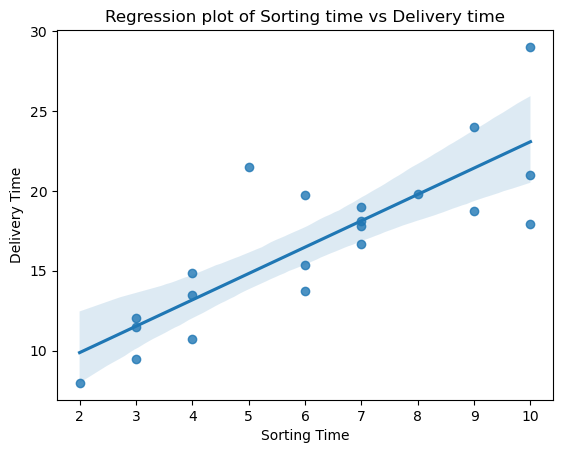

In [10]:
path = 'D:/Linear_Regression_Assignment/'
file_path = os.path.join(path, 'Regression_plot_Delivery_time_Analysis.png')
sns.regplot(x = 'Sorting Time', y = 'Delivery Time', data = data1)
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Regression plot of Sorting time vs Delivery time')
plt.savefig(file_path)
plt.show()

In [8]:
data1.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [9]:
# From the graph and correlation we can see that there is a strong positive
# correlation between the sorting Time and the Delivery Time

# Histogram

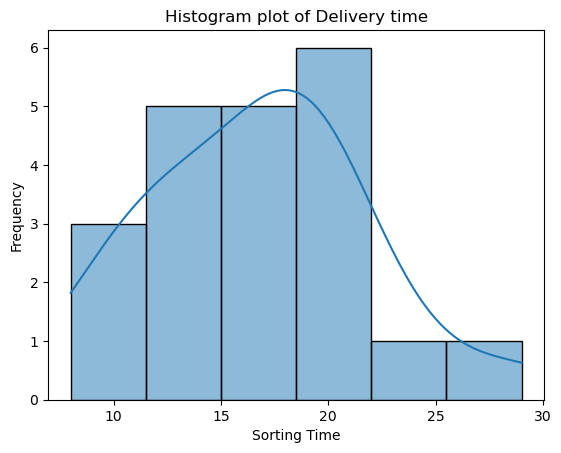

In [15]:
path = 'D:/Linear_Regression_Assignment/'
file_path = os.path.join(path, 'Histogram_plot_Delivery_time_Analysis.png')
sns.histplot(x = 'Delivery Time', data = data1, kde=True)
plt.xlabel('Sorting Time')
plt.ylabel('Frequency')
plt.title('Histogram plot of Delivery time')
plt.savefig(file_path)
plt.show()

In [13]:
import scipy.stats as stats
skewness = stats.skew(data1['Delivery Time'])
print(f'Skewness of Delivery Time data is {round(skewness,2)}')

Skewness of Delivery Time data is 0.33


In [14]:
# From the skewness value, we can stat that it is slightly right skewed
# But it is not strong enough to consider

# Box plot

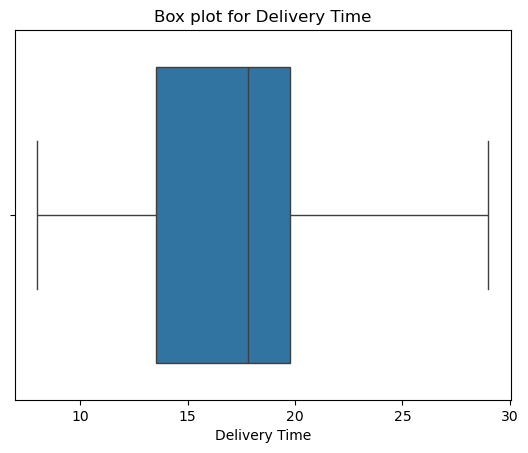

In [16]:
path = 'D:/Linear_Regression_Assignment/'
file_path = os.path.join(path, 'Box_plot_Delivery_time_Analysis.png')
sns.boxplot(x = 'Delivery Time', data= data1)
plt.xlabel('Delivery Time')
plt.title('Box plot for Delivery Time')
plt.savefig(file_path)
plt.show()

In [17]:
# From this we can conclude that there is no outliers

# Line Plot

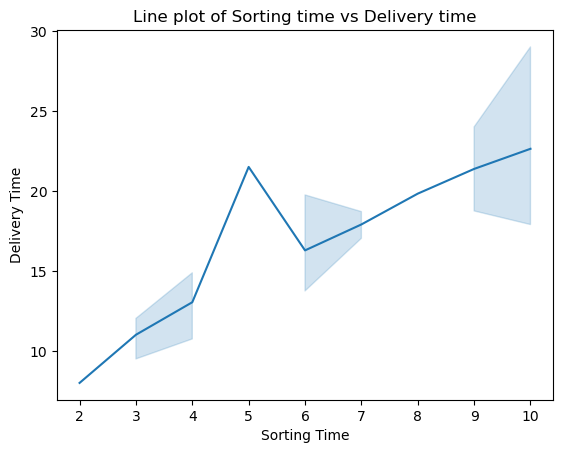

In [18]:
path = 'D:/Linear_Regression_Assignment/'
file_path = os.path.join(path, 'Line_plot_Delivery_time_Analysis.png')
sns.lineplot(x = 'Sorting Time', y = 'Delivery Time', data = data1)
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Line plot of Sorting time vs Delivery time')
plt.savefig(file_path)
plt.show()

In [19]:
# Sorting time is increases with delivery time, but at some particular point
# between 4 and 6 it is getting to the max

# Model Planning

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
lr = LinearRegression()

In [21]:
x = np.array(data1['Sorting Time']).reshape(-1,1)

In [22]:
y = np.array(data1['Delivery Time']).reshape(-1,1)

# Splitting the train_test_split as 80:20

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8)

In [24]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((16, 1), (16, 1), (5, 1), (5, 1))

In [25]:
lr_fit = lr.fit(x_train, y_train)

In [26]:
x_test = np.array(x_test).reshape(-1,1)

In [27]:
pred = lr.predict(x_test)
pred

array([[23.37815934],
       [19.85980769],
       [16.34145604],
       [11.06392857],
       [11.06392857]])

In [29]:
data1_pred = pd.DataFrame(pred, columns=['Pred'])
data1_pred.shape

(5, 1)

In [30]:
data1_pred['Actual'] = np.array(y_test).reshape(-1,1)
data1_pred

,Pred,Actual
0,23.378159,21.00
1,19.859808,19.83
2,16.341456,19.75
3,11.063929,11.50
4,11.063929,12.03


In [31]:
r2 = r2_score(data1_pred['Actual'], data1_pred['Pred'])
print(f'The R^2 Score of Actual and Predicted is {round(r2,4)}')

The R^2 Score of Actual and Predicted is 0.787


In [ ]:
# From the r2_score we can see that it is a good fit
# The Predictive power is high
# And there is a strong relationship between the years of experience and the salary

In [32]:
rmse = sqrt(mean_squared_error(data1_pred['Actual'], data1_pred['Pred']))
print(f'The RMSE value of this model is {round(rmse, 2)}')

The RMSE value of this model is 1.92


In [ ]:
# The RMSE of 1.92 indicates that this model's predictions have
# Relatively low prediction errors

# Splitting the train_test_split as 75:25

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.75)

In [34]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((15, 1), (15, 1), (6, 1), (6, 1))

In [35]:
lr_fit = lr.fit(x_train, y_train)

In [36]:
x_test = np.array(x_test).reshape(-1,1)

In [37]:
pred = lr.predict(x_test)
pred

array([[20.79434122],
       [10.92534628],
       [16.56477196],
       [16.56477196],
       [12.3352027 ],
       [12.3352027 ]])

In [38]:
data1_pred = pd.DataFrame(pred, columns=['Pred'])
data1_pred.shape

(6, 1)

In [39]:
data1_pred['Actual'] = np.array(y_test).reshape(-1,1)
data1_pred

,Pred,Actual
0,20.794341,24.00
1,10.925346,8.00
2,16.564772,15.35
3,16.564772,19.75
4,12.335203,12.03
5,12.335203,9.50


In [40]:
r2 = r2_score(data1_pred['Actual'], data1_pred['Pred'])
print(f'The R^2 Score of Actual and Predicted is {round(r2,4)}')

The R^2 Score of Actual and Predicted is 0.7984


In [ ]:
# From the r2_score we can see that it is a good fit
# The Predictive power is high
# Also compare to 80:20 split this 75:25 split is giving a slightly better results

In [41]:
rmse = sqrt(mean_squared_error(data1_pred['Actual'], data1_pred['Pred']))
print(f'The RMSE value of this model is {round(rmse, 2)}')

The RMSE value of this model is 2.54


In [ ]:
# RMSE of 2.54 is within the reasonable range but this model's predictions have
# Moderate prediction error, but in 80:20 split it was better

# Splitting the train_test_split as 70:30

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7)

In [43]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((14, 1), (14, 1), (7, 1), (7, 1))

In [44]:
lr_fit = lr.fit(x_train, y_train)

In [45]:
x_test = np.array(x_test).reshape(-1,1)

In [46]:
pred = lr.predict(x_test)
pred

array([[22.712 ],
       [17.5604],
       [15.8432],
       [22.712 ],
       [17.5604],
       [22.712 ],
       [14.126 ]])

In [47]:
data1_pred = pd.DataFrame(pred, columns=['Pred'])
data1_pred.shape

(7, 1)

In [48]:
data1_pred['Actual'] = np.array(y_test).reshape(-1,1)
data1_pred

,Pred,Actual
0,22.7120,29.00
1,17.5604,18.11
2,15.8432,19.75
3,22.7120,21.00
4,17.5604,19.00
5,22.7120,17.90
6,14.1260,21.50


In [49]:
r2 = r2_score(data1_pred['Actual'], data1_pred['Pred'])
print(f'The R^2 Score of Actual and Predicted is {round(r2,4)}')

The R^2 Score of Actual and Predicted is -0.5695


In [ ]:
# Negative r2 score indicates there is unusual in the context of Linear regression
# It is worse than a horizontal line

In [50]:
rmse = sqrt(mean_squared_error(data1_pred['Actual'], data1_pred['Pred']))
print(f'The RMSE value of this model is {round(rmse, 2)}')

The RMSE value of this model is 4.43


In [ ]:
# Comparing all the splits, we can take the 75:25 split as the ideal model for this
# Linear regression of Sorting time vs Delivery time